# Data Wrangling

In this notebook, we perform data cleaning, fix missing values, and add new columns with meaning values.

## Loading modules

In [1]:
import pandas as pd
import numpy as np
#To find the file encoding type
import chardet 

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Importing and loading the data

### Test data
We acquired the test score data for the [California Assessment of Student Performance and Progress (CAASPP)](https://caaspp.cde.ca.gov/). The data is available between 2015 and 2018.

* [CAASPP test scores](https://caaspp.cde.ca.gov/sb2018/ResearchFileList) 

#### Test data
We first load the 2018 test data.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("../Data/sb_ca2018_all_csv_v3/sb_ca2018_all.csv")

In [5]:
df.shape

(3269730, 32)

In [6]:
df.head()

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,NaN,2018,1,B,3180554,3177403,3,1,445017,434454,2424.0,26.13,22.09,48.22,23.49,28.29,434193,25.32,44.02,30.66,23.84,43.30,32.85,20.89,61.25,17.86,27.60,47.71,24.68
1,0,0,0,NaN,2018,1,B,3187375,3184687,3,2,445018,436464,2430.9,21.07,27.82,48.89,23.56,27.55,436215,33.59,33.20,33.21,26.72,42.30,30.98,28.80,46.31,24.89,0.00,0.00,0.00
2,0,0,0,NaN,2018,1,B,3187375,3184687,4,2,463838,455589,2467.7,18.46,24.45,42.92,30.81,26.27,455315,29.03,31.02,39.95,21.65,44.73,33.62,24.03,43.78,32.20,0.00,0.00,0.00
3,0,0,0,NaN,2018,1,B,3180554,3177403,4,1,463838,453771,2463.7,26.31,22.36,48.67,19.25,32.08,453491,24.77,46.77,28.46,24.18,44.21,31.61,19.30,63.22,17.48,25.86,48.83,25.31
4,0,0,0,NaN,2018,1,B,3180554,3177403,5,1,469247,459433,2496.3,21.80,27.63,49.43,19.99,30.58,459208,24.22,45.02,30.76,29.20,41.42,29.38,16.52,59.74,23.73,28.29,44.32,27.39


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269730 entries, 0 to 3269729
Data columns (total 32 columns):
County Code                          int64
District Code                        int64
School Code                          int64
Filler                               float64
Test Year                            int64
Subgroup ID                          int64
Test Type                            object
Total Tested At Entity Level         object
Total Tested with Scores             object
Grade                                int64
Test Id                              int64
CAASPP Reported Enrollment           object
Students Tested                      object
Mean Scale Score                     object
Percentage Standard Exceeded         object
Percentage Standard Met              object
Percentage Standard Met and Above    object
Percentage Standard Nearly Met       object
Percentage Standard Not Met          object
Students with Scores                 object
Area 1 Percen

#### Entity tables
The following entity files list the County, District, and School entity names and codes for all entities as the existed in the administration year selected. This file must be merged with the test data file to join these entity names with the appropriate score data.

In [8]:
#find the file encoding type
with open("../Data/sb_ca2018_all_csv_v3/sb_ca2018entities.csv", 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
    
entities = pd.read_csv("../Data/sb_ca2018_all_csv_v3/sb_ca2018entities.csv", encoding=result['encoding'])

In [9]:
entities.shape

(11333, 10)

In [10]:
entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 10 columns):
County Code      11333 non-null int64
District Code    11333 non-null int64
School Code      11333 non-null int64
Filler           0 non-null float64
Test Year        11333 non-null int64
Type Id          11333 non-null int64
County Name      11333 non-null object
District Name    11274 non-null object
School Name      10251 non-null object
Zip Code         11333 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 885.5+ KB


In [11]:
entities.head()

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,35,67520,6035109,NaN,2018,7,San Benito,Panoche Elementary,Panoche Elementary,95043
1,35,67538,0,NaN,2018,6,San Benito,San Benito High,NaN,
2,35,67538,3530029,NaN,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023
3,35,67538,3537008,NaN,2018,7,San Benito,San Benito High,San Benito High,95023
4,35,67553,0,NaN,2018,6,San Benito,Southside Elementary,NaN,


In [12]:
entities.loc[(entities['District Name'] == 'Irvine Unified'), :]

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
7499,30,73650,0,NaN,2018,6,Orange,Irvine Unified,NaN,
7500,30,73650,127472,NaN,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620
7501,30,73650,129155,NaN,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620
7502,30,73650,129296,NaN,2018,7,Orange,Irvine Unified,Portola Springs Elementary,92618
7503,30,73650,133389,NaN,2018,7,Orange,Irvine Unified,Beacon Park,92618
7504,30,73650,135137,NaN,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620
7505,30,73650,3030129,NaN,2018,7,Orange,Irvine Unified,Creekside High,92606
7506,30,73650,3030152,NaN,2018,7,Orange,Irvine Unified,Irvine High,92604
7507,30,73650,3030285,NaN,2018,7,Orange,Irvine Unified,Woodbridge High,92604
7508,30,73650,3030467,NaN,2018,7,Orange,Irvine Unified,Alternative Education-San Joaquin High,92606


#### Subgroup and Test ID tables
Each `Subgroup ID` has the following meanings. We can investigate the characteristics of individual students. 

In [13]:
subgroup = pd.read_csv("../Data/Subgroups.txt", header=None)
subgroup.shape

(47, 4)

In [14]:
subgroup.head()

,0,1,2,3
0,1,1,"""All Students""","""All Students"""
1,3,3,"""Male""","""Gender"""
2,4,4,"""Female""","""Gender"""
3,6,6,"""Fluent English proficient and English only""","""English-Language Fluency"""
4,7,7,"""Initial fluent English proficient (IFEP)""","""English-Language Fluency"""


In [15]:
#delete first column (redundant with the second column); axis = 0 (index) and axis =1 (column), inplace=True means adjusting
subgroup.drop(0, axis=1, inplace=True)
subgroup.columns = ['Subgroup ID', 'Student Groups', 'Category']
#same expression: subgroup[['Subgroup ID', 'Student Groups', 'Category']]
subgroup.sort_values("Category")
subgroup.head(47)

,Subgroup ID,Student Groups,Category
0,1,"""All Students""","""All Students"""
1,3,"""Male""","""Gender"""
2,4,"""Female""","""Gender"""
3,6,"""Fluent English proficient and English only""","""English-Language Fluency"""
4,7,"""Initial fluent English proficient (IFEP)""","""English-Language Fluency"""
5,8,"""Reclassified fluent English proficient (RFEP)""","""English-Language Fluency"""
6,28,"""Migrant education""","""Migrant"""
7,31,"""Economically disadvantaged""","""Economic Status"""
8,74,"""Black or African American""","""Ethnicity"""
9,75,"""American Indian or Alaska Native""","""Ethnicity"""


The `Test ID` has the following meanings. The `Test ID` is 1-4; 1 represents ELA and 2 represents mathematics, respectively. We do not consider 3 and 4 because they are CAA (California Alternative Assessments) scores. The CAA scores are taken by students in grades 3–8 and grade 11 whose individualized education program (IEP) teams have determined that the student's cognitive disabilities prevent him or her from taking the online CAASPP Smarter Balanced assessments.

In [16]:
tests_id = pd.read_csv("../Data/Tests.txt", header=None)
tests_id.head()

,0,1,2
0,Test ID,Test ID Num,Test Name
1,1,1,SB - English Language Arts/Literacy
2,2,2,SB - Mathematics
3,3,3,CAA - English Language Arts/Literacy
4,4,4,CAA - Mathematics


### House prices
* [Zillow research data](https://www.zillow.com/research/data/): House prices based on zipcodes

The Zillow Home Value Index (ZHVI) data was imported and loaded. The ZHVI is a seasonally adjusted measure of the median estimated home value across a given region and housing type. The data was collected from April 1996 to November 2018 on monthly basis. In order to analyze the school performance on a yearly basis, the monthly prices was aggregated into the median value each year.

In [17]:
#with open("../Data/Zip_Zhvi_AllHomes.csv", 'rb') as f:
#    result = chardet.detect(f.read())  # or readline if the file is large
result= {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [18]:
df_house_price = pd.read_csv("../Data/Zip_Zhvi_AllHomes.csv", encoding='ISO-8859-1', index_col=1)
df_house_price = df_house_price.drop(df_house_price[df_house_price.State != 'CA'].index)

In [19]:
df_house_price.shape

(1241, 278)

In [20]:
df_house_price.head()

,RegionID,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
94109,97564,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,13,299300.0,299200.0,299200.0,299300.0,299400.0,299700.0,300100.0,300700.0,301900.0,303400.0,305100.0,306800.0,308800.0,310900.0,313300.0,316000.0,318800.0,321800.0,325100.0,328800.0,332900.0,337400.0,341700.0,346000.0,350600.0,355300.0,360300.0,365300.0,370300.0,375300.0,380500.0,385800.0,391600.0,397600.0,403800.0,410300.0,417500.0,425200.0,433700.0,442900.0,452600.0,463000.0,473900.0,485400.0,497500.0,509800.0,521800.0,533400.0,544900.0,555900.0,566300.0,576000.0,584700.0,592300.0,598800.0,604200.0,608300.0,611100.0,612600.0,612900.0,612000.0,610200.0,607800.0,604700.0,601100.0,597100.0,592900.0,588700.0,584400.0,580300.0,576800.0,574000.0,571600.0,570100.0,569200.0,568800.0,568800.0,569000.0,569500.0,570100.0,571000.0,572600.0,574700.0,576700.0,578200.0,579400.0,581200.0,584200.0,588600.0,594700.0,602000.0,610800.0,621000.0,632000.0,642900.0,653600.0,664200.0,674400.0,684400.0,694200.0,703700.0,712800.0,721300.0,729000.0,736100.0,742400.0,747700.0,752000.0,754900.0,756500.0,757400.0,758500.0,760300.0,762600.0,765000.0,767200.0,769100.0,770900.0,772500.0,774800.0,778600.0,783800.0,789500.0,794600.0,798000.0,799000.0,798400.0,797400.0,797600.0,799700.0,803200.0,807000.0,810500.0,812500.0,812500.0,811500.0,810500.0,809000.0,806600.0,802900.0,797800.0,792200.0,786800.0,782400.0,780600.0,781000.0,781900.0,781300.0,778300.0,773800.0,769500.0,765200.0,761800.0,759400.0,755800.0,749400.0,7

The column name `RegionName` denotes zipcode so it needs to be renamed.

In [21]:
def getYearPart(year_month):
    res = year_month.split('-')
    #If there is no '-', just return its original value
    return res[0]

In [22]:
dropColumns = [ x for x in df_house_price.columns 
                 if (not getYearPart(x).isdigit()) or 
                     (int(getYearPart(x)) < 2014 or int(getYearPart(x)) > 2018) ]
df_house_price_grouped = df_house_price.drop(columns=dropColumns).groupby(getYearPart, axis=1).mean()
df_house_price_grouped.head()


,2014,2015,2016,2017,2018
RegionName,,,,,
94109,9.807833e+05,1.084642e+06,1.160358e+06,1.192208e+06,1.247918e+06
90250,4.343250e+05,4.690833e+05,5.210917e+05,5.745500e+05,6.231091e+05
94565,2.694083e+05,3.091083e+05,3.539417e+05,3.871333e+05,4.219364e+05
90046,1.036367e+06,1.174608e+06,1.273350e+06,1.353442e+06,1.451655e+06
94501,6.947000e+05,7.905250e+05,8.583250e+05,9.266583e+05,9.879909e+05


In [23]:
df_house_price_stacked = df_house_price_grouped.stack().to_frame()
df_house_price_stacked.columns = ['ZHVI_mean']
df_house_price_stacked.index.names = ['ZIP', 'Year']
df_house_price_stacked


ZHVI_mean
ZIP   Year              
94109 2014  9.807833e+05
      2015  1.084642e+06
      2016  1.160358e+06
      2017  1.192208e+06
      2018  1.247918e+06
90250 2014  4.343250e+05
      2015  4.690833e+05
      2016  5.210917e+05
      2017  5.745500e+05
      2018  6.231091e+05
94565 2014  2.694083e+05
      2015  3.091083e+05
      2016  3.539417e+05
      2017  3.871333e+05
      2018  4.219364e+05
90046 2014  1.036367e+06
      2015  1.174608e+06
      2016  1.273350e+06
      2017  1.353442e+06
      2018  1.451655e+06
94501 2014  6.947000e+05
      2015  7.905250e+05
      2016  8.583250e+05
      2017  9.266583e+05
      2018  9.879909e+05
94110 2014  1.115600e+06
      2015  1.279708e+06
      2016  1.310283e+06
      2017  1.435142e+06
      2018  1.531100e+06
...                  ...
93517 2014  2.275667e+05
      2015  2.469083e+05
      2016  2.584917e+05
      2017  2.740417e+05
      2018  2.784273e+05
96148 2014  4.439333e+05
      2015  4.652333e+05
      2016  5.051167e+05
      2017  5.513667e+05
      2018  5.873545e+05
95728 2014  4.061417e+05
      2015  4.538667e+05
      2016  4.874667e+05
      2017  4.706250e+05
      2018  5.066727e+05
95497 2014  6.565250e+05
      2015  7.268750e+05
      2016  7.465750e+05
      2017  7.754500e+05
      2018  8.367273e+05
92322 2014  1.297750e+05
      2015  1.335083e+05
      2016  1.540167e+05
      2017  1.770417e+05
      2018  2.020727e+05
92341 2014  1.314417e+05
      2015  1.472750e+05
      2016  1.591250e+05
      2017  1.743667e+05
      2018  1.910545e+05

[6204 rows x 1 columns]

### Additional datasets:  Teachers demographics
Additional datasets are obtained in the following sites:
* [Civil Rights Data Collection](https://ocrdata.ed.gov/): Teacher demographics

* [GreatSchools API](https://www.greatschools.org/api/docs/technical-overview/): School profile, school reviews, school censuc data, nearby schools

## Joining multiple datasets
For example, if we want the DataFrame where the district is **Irvine Unified**, the ethnicity is **Asian** for the **3rd** grade, we can obtain it as follows.

In [24]:
df.loc[(df['District Code'] == 73650) & (df['Subgroup ID'] == 76) & (df['Grade'] == 3), ['Percentage Standard Exceeded', 'Percentage Standard Met', 'Percentage Standard Nearly Met', 'Percentage Standard Not Met', 'School Code']]

,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,School Code
1602961,58.03,29.65,8.98,3.34,0
1602962,60.20,21.14,11.81,6.85,0
1603803,74.12,18.82,2.35,4.71,129155
1603804,75.00,16.67,3.57,4.76,129155
1604137,61.97,29.58,7.04,1.41,129296
1604138,60.56,21.13,11.27,7.04,129296
1604465,50.00,32.81,12.50,4.69,133389
1604466,52.38,22.22,12.70,12.70,133389
1604845,44.74,36.84,13.16,5.26,135137
1604846,50.00,33.33,8.33,8.33,135137


In [25]:
#Retreive District Code with District Name from entities DataFrame

school_code_dict = {}

def make_code_dict(code, name):   
    if code not in school_code_dict.keys():
        school_code_dict[code] = name

code = entities.loc[(entities['District Name'] == 'Irvine Unified'), ['District Code']].iloc[0][0]
name = 'Irvine Unified'

#make the input parameter dataframe (Series of school names and get the codes)
make_code_dict(code, name)

print(school_code_dict)

{73650: 'Irvine Unified'}


In [26]:
entities.loc[(entities['School Name'] == 'Eastwood Elementary'), :]

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
5605,19,64840,6020903,NaN,2018,7,Los Angeles,Norwalk-La Mirada Unified,Eastwood Elementary,90638
7421,30,66746,6030761,NaN,2018,7,Orange,Westminster,Eastwood Elementary,92683
7504,30,73650,135137,NaN,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


In [27]:
entities.loc[(entities['School Name'] == 'Eastwood Elementary') & 
             (entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange') &
             (entities['Zip Code'] == '92620'), :]

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
7504,30,73650,135137,NaN,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


In [28]:
code = entities.loc[(entities['School Name'] == 'Eastwood Elementary'), ['School Code']]

#.iloc[0][0]
#name = 'Irvine Unified'

#make_code_dict(code, name)
code


,School Code
5605,6020903
7421,6030761
7504,135137


In [29]:
#Eastwood elementary school cpde
school_code = entities.loc[(entities['School Name'] == 'Eastwood Elementary') & 
             (entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange') &
             (entities['Zip Code'] == '92620'), ['School Code']]

#school_code.values[0]
#school_code.get_values()[0]

#get a value from a cell of a dataframe
eastwood_code = school_code.iloc[0][0]

In [30]:
#Eastwood
df.iloc[1604845]

County Code                              30
District Code                         73650
School Code                          135137
Filler                                  NaN
Test Year                              2018
Subgroup ID                              76
Test Type                                 B
Total Tested At Entity Level            141
Total Tested with Scores                141
Grade                                     3
Test Id                                   2
CAASPP Reported Enrollment               39
Students Tested                          38
Mean Scale Score                     2495.1
Percentage Standard Exceeded          44.74
Percentage Standard Met               36.84
Percentage Standard Met and Above     81.58
Percentage Standard Nearly Met        13.16
Percentage Standard Not Met            5.26
Students with Scores                     38
Area 1 Percentage Above Standard      57.89
Area 1 Percentage Near Standard       34.21
Area 1 Percentage Below Standard

In [31]:
#Eastwood
#Test Id = 1
# Smarter Balanced (SB) Summative Assessments
# California Alternate Assessments
#Todo: load test.txt
df.iloc[1604846]

County Code                              30
District Code                         73650
School Code                          135137
Filler                                  NaN
Test Year                              2018
Subgroup ID                              76
Test Type                                 B
Total Tested At Entity Level            118
Total Tested with Scores                118
Grade                                     3
Test Id                                   1
CAASPP Reported Enrollment               39
Students Tested                          36
Mean Scale Score                     2486.6
Percentage Standard Exceeded          50.00
Percentage Standard Met               33.33
Percentage Standard Met and Above     83.33
Percentage Standard Nearly Met         8.33
Percentage Standard Not Met            8.33
Students with Scores                     36
Area 1 Percentage Above Standard      47.22
Area 1 Percentage Near Standard       41.67
Area 1 Percentage Below Standard

In [32]:
#Ethnity
eastwood = df.loc[(df['School Code'] == school_code.iloc[0][0]) & (df['Grade'] == 13), :]
#& (df['Subgroup ID'] == 80)
#& ((df['Subgroup ID'] == 76) | (df['Subgroup ID'] == 74))

#eastwood.shape #all: (322, 32)

eastwood

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
1604777,30,73650,135137,NaN,2018,1,B,218,218,13,2,221,218,NaN,37.16,33.49,70.64,18.35,11.01,218,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00
1604778,30,73650,135137,NaN,2018,1,B,191,191,13,1,221,191,NaN,34.55,36.65,71.20,15.18,13.61,191,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66
1604787,30,73650,135137,NaN,2018,3,B,108,108,13,2,110,108,NaN,44.44,27.78,72.22,17.59,10.19,108,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00
1604788,30,73650,135137,NaN,2018,3,B,95,95,13,1,110,95,NaN,28.42,38.95,67.37,17.89,14.74,95,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84
1604797,30,73650,135137,NaN,2018,4,B,96,96,13,1,111,96,NaN,40.63,34.38,75.00,12.50,12.50,96,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50
1604798,30,73650,135137,NaN,2018,4,B,110,110,13,2,111,110,NaN,30.00,39.09,69.09,19.09,11.82,110,45.45,38.18,16.36,39.09,44.55,16.36,34.55,53.64,11.82,0.00,0.00,0.00
1604807,30,73650,135137,NaN,2018,6,B,151,151,13,1,153,151,NaN,39.74,37.09,76.82,13.91,9.27,151,43.05,42.38,14.57,47.02,40.40,12.58,24.50,67.55,7.95,41.06,48.34,10.60
1604808,30,73650,135137,NaN,2018,6,B,151,151,13,2,153,151,NaN,39.74,33.77,73.51,18.54,7.95,151,52.98,35.76,11.26,43.05,43.05,13.91,42.38,49.01,8.61,0.00,0.00,0.00
1604817,30,73650,135137,NaN,2018,7,B,26,26,13,1,27,26,NaN,65.38,30.77,96.15,3.85,0.00,26,69.23,26.92,3.85,73.08,26.92,0.00,26.92,69.23,3.85,53.85,46.15,0.00
1604818,30,73650,135137,NaN,2018,7,B,26,26,13,2,27,26,NaN,80.77,15.38,96.15,3.85,0.00,26,92.31,7.69,0.00,76.92,23.08,0.00,73.08,26.92,0.00,0.00,0.00,0.00


In [33]:
df.loc[(df['Grade'] == 13), :]

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
14,0,0,0,NaN,2018,1,B,3187375,3184687,13,2,3275552,3187375,NaN,18.64,20.01,38.65,25.90,35.45,3184687,26.49,29.68,43.83,20.73,42.58,36.69,21.17,46.33,32.50,0.00,0.00,0.00
15,0,0,0,NaN,2018,1,B,3180554,3177403,13,1,3275551,3180554,NaN,21.25,28.63,49.88,22.58,27.54,3177403,24.95,44.41,30.64,26.71,43.82,29.46,17.67,62.01,20.32,29.44,46.83,23.72
30,0,0,0,NaN,2018,3,B,1628756,1627241,13,2,1676315,1628756,NaN,19.42,19.38,38.80,24.64,36.56,1627241,27.23,28.27,44.50,21.59,41.43,36.98,21.28,44.67,34.05,0.00,0.00,0.00
31,0,0,0,NaN,2018,3,B,1625019,1623180,13,1,1676316,1625019,NaN,18.20,26.51,44.70,22.71,32.59,1623180,22.42,42.72,34.86,21.84,42.98,35.18,16.79,60.51,22.70,25.42,46.53,28.05
46,0,0,0,NaN,2018,4,B,1558619,1557446,13,2,1599237,1558619,NaN,17.83,20.67,38.50,27.21,34.29,1557446,25.72,31.15,43.13,19.83,43.78,36.39,21.06,48.06,30.88,0.00,0.00,0.00
47,0,0,0,NaN,2018,4,B,1555535,1554223,13,1,1599235,1555535,NaN,24.43,30.86,55.29,22.45,22.26,1554223,27.59,46.18,26.23,31.80,44.70,23.50,18.59,63.57,17.83,33.64,47.15,19.20
62,0,0,0,NaN,2018,6,B,2645421,2642898,13,1,2712522,2645421,NaN,25.02,32.36,57.38,22.23,20.39,2642898,29.31,46.72,23.97,31.33,45.83,22.84,20.60,63.98,15.43,34.16,47.58,18.25
63,0,0,0,NaN,2018,6,B,2640163,2638035,13,2,2712520,2640163,NaN,21.79,22.24,44.03,26.52,29.45,2638035,30.44,31.63,37.93,24.11,45.16,30.73,24.53,48.15,27.32,0.00,0.00,0.00
78,0,0,0,NaN,2018,7,B,134324,134250,13,2,136665,134324,NaN,41.41,23.22,64.63,20.33,15.05,134250,50.73,28.10,21.17,43.08,40.67,16.25,43.49,42.13,14.38,0.00,0.00,0.00
79,0,0,0,NaN,2018,7,B,134444,134372,13,1,136665,134444,NaN,44.16,32.20,76.36,14.67,8.97,134372,47.07,40.98,11.95,50.38,38.58,11.04,33.82,59.09,7.09,52.49,39.15,8.36


In [34]:
school_df = pd.read_csv("../Data/pubschls.txt", encoding='ISO-8859-1', sep='\t')
school_df.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,Latitude,Longitude,AdmFName1,AdmLName1,AdmEmail1,AdmFName2,AdmLName2,AdmEmail2,AdmFName3,AdmLName3,AdmEmail3,LastUpDate
0,1100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,94544-1136,CA,313 West Winton Avenue,313 West Winton Ave.,Hayward,94544-1136,CA,(510) 887-0152,No Data,www.acoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.658212,-122.09713,L Karen,Monroe,lkmonroe@acoe.org,No Data,No Data,No Data,No Data,No Data,No Data,02/02/2017
1,1100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,94560-5359,CA,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,94560-5359,CA,No Data,No Data,No Data,08/29/2005,07/31/2015,Y,0728,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,K-12,K-12,P,N,37.521436,-121.99391,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,09/01/2015
2,1100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,94612-3355,CA,1515 Webster Street,1515 Webster St.,Oakland,94612,CA,(510) 596-8901,No Data,www.envisionacademy.org/,08/28/2006,No Data,Y,0811,Directly funded,0,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,N,N,37.804520,-122.26815,Eve,Gordon,eve@envisionacademy.org,No Data,No Data,No Data,No Data,No Data,No Data,07/26/2017
3,1100170118489,0691051,12283,Closed,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,2125 Jefferson Avenue,2125 Jefferson Ave.,Berkeley,94703-1414,CA,"1001 22nd Avenue, Suite 100","1001 22nd Ave., Ste. 100",Oakland,94606,CA,No Data,No Data,www.aspirepublicschools.org,08/21/2008,06/30/2015,Y,1049,Directly funded,0,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,N,N,37.868991,-122.27844,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,07/01/2015
4,1100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,94606-4903,CA,2111 International Boulevard,2111 International Blvd.,Oakland,94606-4903,CA,(510) 686-4131,No Data,www.communityschoolforcreativeeducation.org,08/22/2011,No Data,Y,1284,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,37.784648,-122.23863,Monique,Brinson,moniqueb@communityschoolforcreativeeducation.org,No Data,No Data,No Data,No Data,No Data,No Data,08/16/2017


In [35]:
school_df[school_df['School'] == 'Eastwood Elementary']

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,Latitude,Longitude,AdmFName1,AdmLName1,AdmEmail1,AdmFName2,AdmLName2,AdmEmail2,AdmFName3,AdmLName3,AdmEmail3,LastUpDate
6370,19648406020903,0627690,04160,Active,Los Angeles,Norwalk-La Mirada Unified,Eastwood Elementary,15730 Pescados Drive,15730 Pescados Dr.,La Mirada,90638-4999,CA,15730 Pescados Drive,15730 Pescados Dr.,La Mirada,90638-4999,CA,(562) 210-2650,No Data,www.eastwoodelem.org,07/01/1980,No Data,N,No Data,No Data,54,Unified School District,60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-5,K-5,N,N,33.897511,-117.99594,Yvette,Cantu,ycantu@nlmusd.k12.ca.us,No Data,No Data,No Data,No Data,No Data,No Data,08/17/2017
9250,30667466030761,0642150,06905,Active,Orange,Westminster,Eastwood Elementary,13552 University,13552 University,Westminster,92683-2770,CA,13552 University,13552 University,Westminster,92683-2770,CA,(714) 894-7227,No Data,No Data,07/01/1980,No Data,N,No Data,No Data,52,Elementary School District,60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-6,K-6,N,N,33.765252,-118.03605,Jan,Sneathen,jsneathen@wsdk8.us,No Data,No Data,No Data,No Data,No Data,No Data,12/10/2018
9364,30736500135137,0684500,14114,Active,Orange,Irvine Unified,Eastwood Elementary,99 Meander,99 Meander,Irvine,92620,CA,99 Meander,99 Meander,Irvine,92620,CA,(949) 936-5000,No Data,http://eastwood.iusd.org,08/24/2017,No Data,N,No Data,No Data,54,Unified School District,60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-6,K-6,N,N,33.715973,-117.75157,Aaron,Jetzer,aaronjetzer@iusd.org,No Data,No Data,No Data,No Data,No Data,No Data,12/17/2018


In [36]:
school_df = school_df.filter(['School', 'CDSCode', 'Longitude', 'Latitude'])

In [37]:
#school_df['CDSCode'] = df[['County Code', 'District Code', 'School Code']].apply(lambda x: ''.join(str(x)), axis=1)
school_df['CDSCode'] = school_df['CDSCode'].astype('str')
school_df['County Code'] = school_df['CDSCode'].str[0:2].astype('int64')
school_df['District Code'] = school_df['CDSCode'].str[2:7].astype('int64')
school_df['School Code'] = school_df['CDSCode'].str[7:].astype('int64')
school_df[school_df['School'] == 'Eastwood Elementary']

,School,CDSCode,Longitude,Latitude,County Code,District Code,School Code
6370,Eastwood Elementary,19648406020903,-117.99594,33.897511,19,64840,6020903
9250,Eastwood Elementary,30667466030761,-118.03605,33.765252,30,66746,6030761
9364,Eastwood Elementary,30736500135137,-117.75157,33.715973,30,73650,135137


In [38]:
school_df = school_df.set_index(['County Code', 'District Code', 'School Code'])
school_df.head(10)

School  \
County Code District Code School Code                                                  
11          170           0                                                  No Data   
                          109835                                 FAME Public Charter   
                          112607              Envision Academy for Arts & Technology   
                          118489       Aspire California College Preparatory Academy   
                          123968             Community School for Creative Education   
                          124172                                     Yu Ming Charter   
                          125567                            Urban Montessori Charter   
                          130302                      Technical, Agricultural & Nat.   
                          130401                  Alameda County Juvenile Hall/Court   
                          130419                            Alameda County Community   

                                             CDSCode   Longitude   Latitude  
County Code District Code School Code                                        
11          170           0            1100170000000  -122.09713  37.658212  
                          109835       1100170109835  -121.99391  37.521436  
                          112607       1100170112607  -122.26815  37.804520  
                          118489       1100170118489  -122.27844  37.868991  
                          123968       1100170123968  -122.23863  37.784648  
                          124172       1100170124172  -122.28356  37.847375  
                          125567       1100170125567  -122.18950  37.778352  
                          130302       1100170130302     No Data    No Data  
                          130401       1100170130401  -122.11173  37.712878  
                          130419       1100170130419  -122.09713  37.658212

In [39]:
df[df['School Code'] == 135137]

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
1604769,30,73650,135137,NaN,2018,1,B,218,218,3,2,62,61,2476.4,37.70,37.70,75.41,16.39,8.20,61,50.82,36.07,13.11,54.10,29.51,16.39,45.90,47.54,6.56,0.00,0.00,0.00
1604770,30,73650,135137,NaN,2018,1,B,191,191,3,1,62,58,2474.3,48.28,29.31,77.59,12.07,10.34,58,48.28,37.93,13.79,51.72,34.48,13.79,22.41,67.24,10.34,48.28,36.21,15.52
1604771,30,73650,135137,NaN,2018,1,B,191,191,4,1,51,41,2461.4,21.95,29.27,51.22,21.95,26.83,41,34.15,41.46,24.39,14.63,56.10,29.27,24.39,51.22,24.39,19.51,56.10,24.39
1604772,30,73650,135137,NaN,2018,1,B,218,218,4,2,51,49,2497.1,22.45,40.82,63.27,22.45,14.29,49,42.86,30.61,26.53,20.41,57.14,22.45,32.65,55.10,12.24,0.00,0.00,0.00
1604773,30,73650,135137,NaN,2018,1,B,218,218,5,2,60,60,2556.8,41.67,26.67,68.33,16.67,15.00,60,55.00,28.33,16.67,38.33,43.33,18.33,28.33,51.67,20.00,0.00,0.00,0.00
1604774,30,73650,135137,NaN,2018,1,B,191,191,5,1,60,51,2555.8,35.29,43.14,78.43,9.80,11.76,51,41.18,47.06,11.76,50.98,35.29,13.73,23.53,66.67,9.80,35.29,50.98,13.73
1604775,30,73650,135137,NaN,2018,1,B,191,191,6,1,48,41,2568.3,26.83,46.34,73.17,19.51,7.32,41,29.27,46.34,24.39,36.59,56.10,7.32,19.51,73.17,7.32,39.02,56.10,4.88
1604776,30,73650,135137,NaN,2018,1,B,218,218,6,2,48,48,2611.6,45.83,29.17,75.00,18.75,6.25,48,54.17,39.58,6.25,45.83,47.92,6.25,39.58,47.92,12.50,0.00,0.00,0.00
1604777,30,73650,135137,NaN,2018,1,B,218,218,13,2,221,218,NaN,37.16,33.49,70.64,18.35,11.01,218,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00
1604778,30,73650,135137,NaN,2018,1,B,191,191,13,1,221,191,NaN,34.55,36.65,71.20,15.18,13.61,191,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66


In [40]:
df_with_geoloc = pd.merge(df[(df['Grade'] == 13) & (df['Subgroup ID'] == 1)],school_df,right_index=True, how='inner',
                          left_on=['County Code', 'District Code', 'School Code'])
df_with_geoloc = pd.merge(df_with_geoloc, entities, on=['County Code', 'District Code', 'School Code'])

In [41]:
df_with_geoloc.head(10)

,County Code,District Code,School Code,Filler_x,Test Year_x,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,School,CDSCode,Longitude,Latitude,Filler_y,Test Year_y,Type Id,County Name,District Name,School Name,Zip Code
0,10,10108,0,NaN,2018,1,B,167,167,13,1,230,167,NaN,0.60,3.59,4.19,18.56,77.25,167,1.20,28.74,70.06,1.21,16.36,82.42,2.99,43.71,53.29,1.80,33.53,64.67,No Data,10101080000000,-119.79037,36.735686,NaN,2018,6,Fresno,Fresno County Office Of Education,NaN,
1,10,10108,0,NaN,2018,1,B,166,165,13,2,231,166,NaN,0.00,0.00,0.00,6.06,93.94,165,0.00,3.64,96.36,0.00,13.94,86.06,0.00,27.27,72.73,0.00,0.00,0.00,No Data,10101080000000,-119.79037,36.735686,NaN,2018,6,Fresno,Fresno County Office Of Education,NaN,
2,10,10108,109991,NaN,2018,1,B,383,381,13,1,415,383,NaN,2.36,14.44,16.80,28.87,54.33,381,7.87,44.62,47.51,2.89,34.91,62.20,3.94,55.64,40.42,6.04,41.99,51.97,Crescent View West Public Charter,10101080109991,-119.78930,36.780422,NaN,2018,9,Fresno,Crescent View West Public Charter,Crescent View West Public Charter,93726
3,10,10108,109991,NaN,2018,1,B,384,382,13,2,416,384,NaN,0.00,1.83,1.83,8.38,89.79,382,0.26,5.50,94.24,0.52,23.30,76.18,0.26,36.39,63.35,0.00,0.00,0.00,Crescent View West Public Charter,10101080109991,-119.78930,36.780422,NaN,2018,9,Fresno,Crescent View West Public Charter,Crescent View West Public Charter,93726
4,10,10108,111682,NaN,2018,1,B,35,35,13,1,38,35,NaN,40.00,40.00,80.00,11.43,8.57,35,57.14,40.00,2.86,51.43,34.29,14.29,31.43,62.86,5.71,42.86,48.57,8.57,Hume Lake Charter,10101080111682,-118.90657,36.809106,NaN,2018,9,Fresno,Hume Lake Charter,Hume Lake Charter,93628
5,10,10108,111682,NaN,2018,1,B,35,35,13,2,38,35,NaN,28.57,42.86,71.43,17.14,11.43,35,37.14,48.57,14.29,31.43,62.86,5.71,45.71,48.57,5.71,0.00,0.00,0.00,Hume Lake Charter,10101080111682,-118.90657,36.809106,NaN,2018,9,Fresno,Hume Lake Charter,Hume Lake Charter,93628
6,10,10108,119628,NaN,2018,1,B,193,192,13,1,199,193,NaN,1.56,8.33,9.90,29.17,60.94,192,4.17,34.38,61.46,3.13,34.38,62.50,2.08,49.48,48.44,4.17,42.19,53.65,Big Picture Educational Academy,10101080119628,-119.80866,36.730149,NaN,2018,9,Fresno,Big Picture Educational Academy,Big Picture Educational Academy,93706
7,10,10108,119628,NaN,2018,1,B,192,192,13,2,199,192,NaN,0.00,4.17,4.17,19.79,76.04,192,1.04,11.46,87.50,1.04,25.52,73.44,0.52,34.38,65.10,0.00,0.00,0.00,Big Picture Educational Academy,10101080119628,-119.80866,36.730149,NaN,2018,9,Fresno,Big Picture Educational Academy,Big Picture Educational Academy,93706
8,10,10108,1030337,NaN,2018,1,B,77,76,13,2,113,77,NaN,0.00,0.00,0.00,2.63,97.37,76,0.00,0.00,100.00,0.00,10.53,89.47,0.00,28.95,71.05,0.00,0.00,0.00,Alice M. Worsley,10101081030337,-119.73137,36.663425,NaN,2018,7,Fresno,Fresno County Office Of Education,Alice M. Worsley,93725
9,10,10108,1030337,NaN,2018,1,B,77,77,13,1,108,77,NaN,0.00,5.19,5.19,20.78,74.03,77,1.30,29.87,68.83,0.00,17.11,82.89,2.60,46.75,50.65,2.60,37.66,59.74,Alice M. Worsley,10101081030337,-119.73137,36.663425,NaN,2018,7,Fresno,Fresno County Office Of Education,Alice M. Worsley,93725


In [42]:
df_with_geoloc[df_with_geoloc['School'] == 'Eastwood Elementary']

,County Code,District Code,School Code,Filler_x,Test Year_x,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,School,CDSCode,Longitude,Latitude,Filler_y,Test Year_y,Type Id,County Name,District Name,School Name,Zip Code
5576,19,64840,6020903,NaN,2018,1,B,234,234,13,2,242,234,NaN,25.64,32.05,57.69,23.93,18.38,234,41.45,31.62,26.92,32.48,41.88,25.64,28.21,50.43,21.37,0.00,0.00,0.00,Eastwood Elementary,19648406020903,-117.99594,33.897511,NaN,2018,7,Los Angeles,Norwalk-La Mirada Unified,Eastwood Elementary,90638
5577,19,64840,6020903,NaN,2018,1,B,235,235,13,1,243,235,NaN,35.74,32.34,68.09,17.87,14.04,235,37.45,45.11,17.45,43.83,40.00,16.17,21.28,69.79,8.94,37.02,48.51,14.47,Eastwood Elementary,19648406020903,-117.99594,33.897511,NaN,2018,7,Los Angeles,Norwalk-La Mirada Unified,Eastwood Elementary,90638
9016,30,66746,6030761,NaN,2018,1,B,280,280,13,1,281,280,NaN,42.86,31.43,74.29,10.00,15.71,280,42.50,41.07,16.43,45.36,37.14,17.50,30.36,60.71,8.93,43.93,41.79,14.29,Eastwood Elementary,30667466030761,-118.03605,33.765252,NaN,2018,7,Orange,Westminster,Eastwood Elementary,92683
9017,30,66746,6030761,NaN,2018,1,B,280,280,13,2,281,280,NaN,42.50,26.43,68.93,17.50,13.57,280,55.00,26.43,18.57,44.64,40.36,15.00,45.36,37.50,17.14,0.00,0.00,0.00,Eastwood Elementary,30667466030761,-118.03605,33.765252,NaN,2018,7,Orange,Westminster,Eastwood Elementary,92683
9178,30,73650,135137,NaN,2018,1,B,218,218,13,2,221,218,NaN,37.16,33.49,70.64,18.35,11.01,218,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,Eastwood Elementary,30736500135137,-117.75157,33.715973,NaN,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620
9179,30,73650,135137,NaN,2018,1,B,191,191,13,1,221,191,NaN,34.55,36.65,71.20,15.18,13.61,191,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,Eastwood Elementary,30736500135137,-117.75157,33.715973,NaN,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

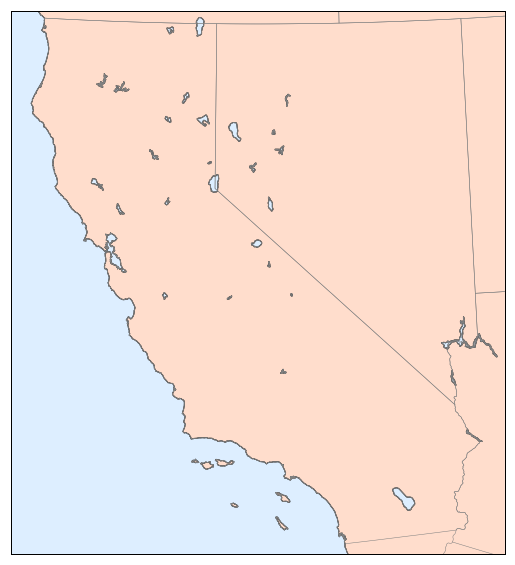

In [14]:
# 1. Draw the map background
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.3, lon_0=-119,
            width=1E6, height=1.1E6)
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcoastlines()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')



**Hypothesis**

- The schools with many Asian students tend to achieve high scores.
- The schools with high-income families tend to achieve high scores.
- The schools with highly educated parents tend to achieve high scores.
- The schools surrounded by high house costs tend to achieve high scores.


* Join two dataframes for obtaining the specific school name